In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

/tmp/ipykernel_39937/4205123439.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Preparation Data**

In [3]:
dataFrame = pd.read_csv('Mall_Customers.csv')

dataFrame.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
39,40,Female,20,37,75
88,89,Female,34,58,60
79,80,Female,49,54,42
18,19,Male,52,23,29
186,187,Female,54,101,24


In [4]:
dataFrame.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [5]:
males_age   = dataFrame[dataFrame['Gender'] == 'Male']  ['Age']
females_age = dataFrame[dataFrame['Gender'] == 'Female']['Age']
age_bins = range(15, 75, 5)


/tmp/ipykernel_39937/2114237413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age,
/tmp/ipykernel_39937/2114237413.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_age,


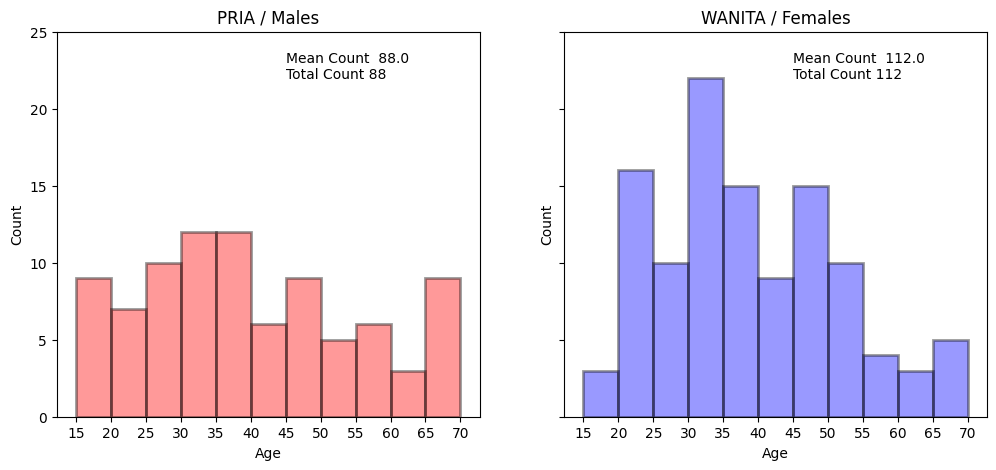

In [6]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)

sns.distplot(males_age,
            bins = age_bins,
            kde = False,
            color = 'red',
            ax = ax1,
            hist_kws = dict(
                edgecolor='k',
                linewidth=2))

ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('PRIA / Males')
ax1.set_ylabel('Count')
ax1.text(45, 22, 'Total Count {}'    .format(males_age.count()))
ax1.text(45, 23, 'Mean Count  {:.1f}'.format(males_age.count()))




sns.distplot(females_age,
            bins = age_bins,
            kde = False,
            color = 'blue',
            ax = ax2,
            hist_kws = dict(
                edgecolor='k',
                linewidth=2))

ax2.set_xticks(age_bins)
ax2.set_ylim(top=25)
ax2.set_title('WANITA / Females')
ax2.set_ylabel('Count')
ax2.text(45, 22, 'Total Count {}'    .format(females_age.count()))
ax2.text(45, 23, 'Mean Count  {:.1f}'.format(females_age.count()))

plt.show()

# **CLustering**

In [7]:
x_numerics = dataFrame[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

x_numerics.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
107,54,63,46
172,36,87,10
1,21,15,81
15,22,20,79
79,49,54,42


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

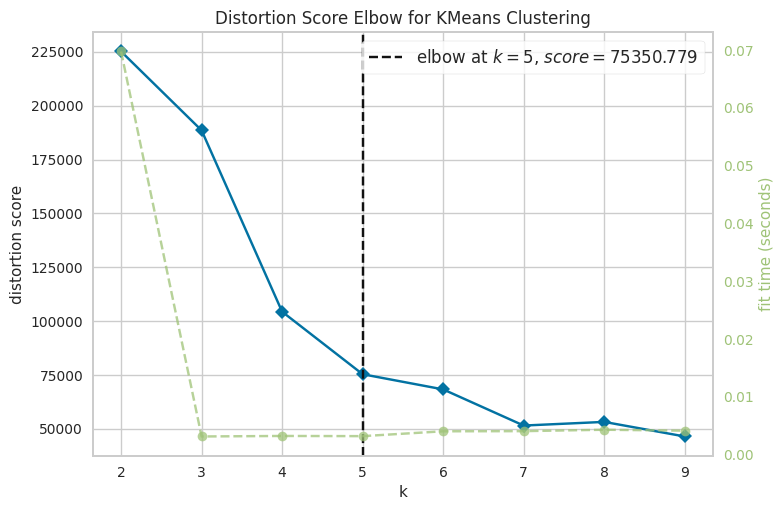

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(x_numerics)
visualizer.show()
# plt.figure(figsize=(14,10))
plt.show()

In [9]:
KM5_clusters = KMeans(n_clusters = 5, init='k-means++').fit(x_numerics)

In [10]:
KM_clustered = x_numerics.copy()
KM_clustered.loc[:,'Cluster'] = KM5_clusters.labels_


In [11]:
KM_cluster_size = KM_clustered.groupby('Cluster').size().to_frame()
KM_cluster_size.columns = ['KM_size']
KM_cluster_size

,KM_size
Cluster,
0,28
1,53
2,68
3,40
4,11


In [12]:
import plotly as py
import plotly.graph_objs as go

In [13]:
dataFrame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
def tracer(db, n, name):
    return go.scatter3d(
        x = db[db['Cluster']== n]['Age'],
        y = db[db['Cluster']== n]['Spending Score (1-100)'],
        z = db[db['Cluster']== n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(size=5)
    )

trace0 = tracer(KM_clustered, 0, 'Cluster 0')
trace1 = tracer(KM_clustered, 1, 'Cluster 1')
trace2 = tracer(KM_clustered, 2, 'Cluster 2')
trace3 = tracer(KM_clustered, 3, 'Cluster 3')
trace4 = tracer(KM_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.layout(
    title = 'Clustering by K-Means',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

TypeError: 'module' object is not callable